In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
# Some EDA
# Read the data
df = pd.read_csv("./data/rawdata.csv")
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Đã bàn giao,62 m²,"32,26 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2 tỷ- 62 m2đ
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Đã bàn giao,95 m²,"55,79 triệu/m²",3 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,"5,3 tỷ- 95 m2đ"
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Chưa bàn giao,75 m²,"34,4 triệu/m²",2 phòng,2,5.0,2 phòng,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,"2,58 tỷ- 75 m2đ"
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Đã bàn giao,70 m²,"57,14 triệu/m²",1 phòng,A,7.0,1 phòng,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4 tỷ- 70 m2đ
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Đã bàn giao,83 m²,"35,54 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,"2,95 tỷ- 83 m2đ"


In [3]:
# Check the shape of the data
df.shape


(24942, 16)

In [4]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24942 entries, 0 to 24941
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24942 non-null  object 
 1   TinhTrangBDS      24921 non-null  object 
 2   DienTich          24914 non-null  object 
 3   Gia/m2            24913 non-null  object 
 4   Phongngu          24923 non-null  object 
 5   TenPhanKhu        7036 non-null   object 
 6   SoTang            6726 non-null   float64
 7   PhongTam          24388 non-null  object 
 8   Loai              24923 non-null  object 
 9   GiayTo            18852 non-null  object 
 10  MaCanHo           3358 non-null   object 
 11  TinhTrangNoiThat  12788 non-null  object 
 12  HuongCuaChinh     9370 non-null   object 
 13  HuongBanCong      8670 non-null   object 
 14  DacDiem           5600 non-null   object 
 15  Gia               24942 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [5]:

# Check the missing value
df.isnull().sum()

DiaChi                  0
TinhTrangBDS           21
DienTich               28
Gia/m2                 29
Phongngu               19
TenPhanKhu          17906
SoTang              18216
PhongTam              554
Loai                   19
GiayTo               6090
MaCanHo             21584
TinhTrangNoiThat    12154
HuongCuaChinh       15572
HuongBanCong        16272
DacDiem             19342
Gia                     0
dtype: int64

In [6]:
# Check the unique value
df.nunique()

DiaChi              3447
TinhTrangBDS           2
DienTich            1045
Gia/m2              5046
Phongngu              10
TenPhanKhu           923
SoTang                54
PhongTam               7
Loai                   6
GiayTo                 3
MaCanHo             1230
TinhTrangNoiThat       4
HuongCuaChinh          8
HuongBanCong           8
DacDiem                1
Gia                 9945
dtype: int64

In [7]:
# Check the distribution of the data
df.describe()

,SoTang
count,6726.000000
mean,11.482307
std,18.142728
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,789.000000


## 1.1. Tiền xử lý dữ liệu

In [8]:
df["DienTich"] = df["DienTich"].str.replace(" m²", "").str.replace(" m2", "")


In [9]:
so_phong_ngu = {
    " 2 phòng":2,
    " 3 phòng":3,
    " 1 phòng":1,
    " 4 phòng":4,
    np.nan: 0,
    " 5 phòng":5,
    " 6 phòng":6,
    " nhiều hơn 10 phòng":11,
    " 7 phòng":7,
    " 10 phòng":10,
    " 8 phòng":8,
}

df["Phongngu"] = df["Phongngu"].replace(so_phong_ngu)

In [10]:
df["PhongTam"].unique()


array([' 2 phòng', ' 1 phòng', ' 4 phòng', ' 3 phòng', nan, ' 5 phòng',
       ' Nhiều hơn 6 phòng', ' 6 phòng'], dtype=object)

In [11]:
so_phong_tam = {
    " 2 phòng":2,
    " 1 phòng":1,
    " 3 phòng":3,
    np.nan: 0,
    " 4 phòng":4,
    " 5 phòng":5,
    " 6 phòng":6,
    " Nhiều hơn 6 phòng":7,
}
df["PhongTam"] = df["PhongTam"].replace(so_phong_tam)

In [12]:
df["PhongTam"].unique()

array([2, 1, 4, 3, 0, 5, 7, 6], dtype=int64)

In [13]:
df["Gia/m2"] = df["Gia/m2"].str.replace("triệu/m²", "").str.replace(",", ".").str.replace(" đ/m²","").str.replace(" triệu", "").str.replace(" tỷ/m²","").str.replace(" đ", "").str.replace("/m2","").astype(float)

In [14]:
for i in range(len(df.Gia)):
    gia = df.Gia[i]
    gia = gia.replace(',', '.')  # Replace comma with dot for decimal separator
    
    # Extract numeric portion using regular expressions
    match = re.search(r"([\d.]+)\s*(triệu|tỷ)", gia)
    if match:
        price = float(match.group(1))
        unit = match.group(2)
        
        # Convert to Vietnamese currency
        if unit == 'triệu':
            price *= 1000000
        elif unit == 'tỷ':
            price *= 1000000000
        
        df.Gia[i] = round(price, 1)
    else:
        df.Gia[i] = None  # Set as None if no valid conversion is possible

In [15]:
df.Gia = df.Gia.astype(float)
df.DienTich = df.DienTich.astype(float)

In [16]:
df['Quan'] = df.DiaChi.copy()
for i in range(0,len(df.DiaChi)):
    a= df.DiaChi[i].split(',')
    df['Quan'][i] = a[len(a)-2]
for i in df['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df = df.drop(df[df['Quan']==i].index)

In [17]:
df.Quan.unique()

array([' Quận 7', ' Quận Bình Tân', ' Quận Tân Bình', ' Quận 6',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh',
       ' Huyện Hóc Môn', ' Quận Thủ Đức', ' Quận 9', ' Quận 10',
       ' Huyện Nhà Bè', ' Quận 12', ' Quận Tân Phú', ' Quận 2',
       ' Quận Phú Nhuận', ' Quận 1', ' Quận 4', ' Quận 11', ' Quận 5',
       ' Quận Gò Vấp', ' Quận 3', ' Huyện Củ Chi'], dtype=object)

In [18]:
# xóa 3 hàng có giá trị lớn nhất của "Gia"
df = df.drop(df[df['Gia'] > 100000000000].index)

In [19]:
# replace Gia/m2 = price * 1000000
df['Gia/m2'] = df['Gia/m2'] * 1000000

In [20]:
df['USD'] = round(df['Gia']/24000,0)
df['Gia/m2'] = round(df['Gia/m2']/24000,0)
rows  = df[df.DienTich > 500]
df = df.drop(index = rows.index)
rows  = df[df.SoTang > 81]
df = df.drop(index = rows.index)

print("The number of row after cleaning data:",len(df))

The number of row after cleaning data: 24540


In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,DienTich,Gia/m2,Phongngu,SoTang,PhongTam,Gia,USD
count,24532.00,24531.00,24540.00,6574.00,24540.00,24539.00,24539.00
mean,71.49,1761.13,2.05,10.99,1.72,2763366834.85,115140.30
std,30.58,2153.90,0.74,7.38,0.65,2502943565.40,104289.33
min,1.00,42.00,1.00,1.00,0.00,1000000.00,42.00
25%,56.00,1126.00,2.00,5.00,1.00,1620000000.00,67500.00
50%,68.00,1450.00,2.00,9.00,2.00,2250000000.00,93750.00
75%,79.00,1913.50,2.00,16.00,2.00,3300000000.00,137500.00
max,500.00,41250.00,11.00,70.00,7.00,68000000000.00,2833333.00


In [22]:
df.to_csv('dataset.csv',encoding="utf-8-sig",index=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24540 entries, 0 to 24941
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24540 non-null  object 
 1   TinhTrangBDS      24538 non-null  object 
 2   DienTich          24532 non-null  float64
 3   Gia/m2            24531 non-null  float64
 4   Phongngu          24540 non-null  int64  
 5   TenPhanKhu        6908 non-null   object 
 6   SoTang            6574 non-null   float64
 7   PhongTam          24540 non-null  int64  
 8   Loai              24540 non-null  object 
 9   GiayTo            18552 non-null  object 
 10  MaCanHo           3298 non-null   object 
 11  TinhTrangNoiThat  12550 non-null  object 
 12  HuongCuaChinh     9202 non-null   object 
 13  HuongBanCong      8530 non-null   object 
 14  DacDiem           5497 non-null   object 
 15  Gia               24539 non-null  float64
 16  Quan              24540 non-null  object 
 17

## 2. Trực quan hóa dữ liệu

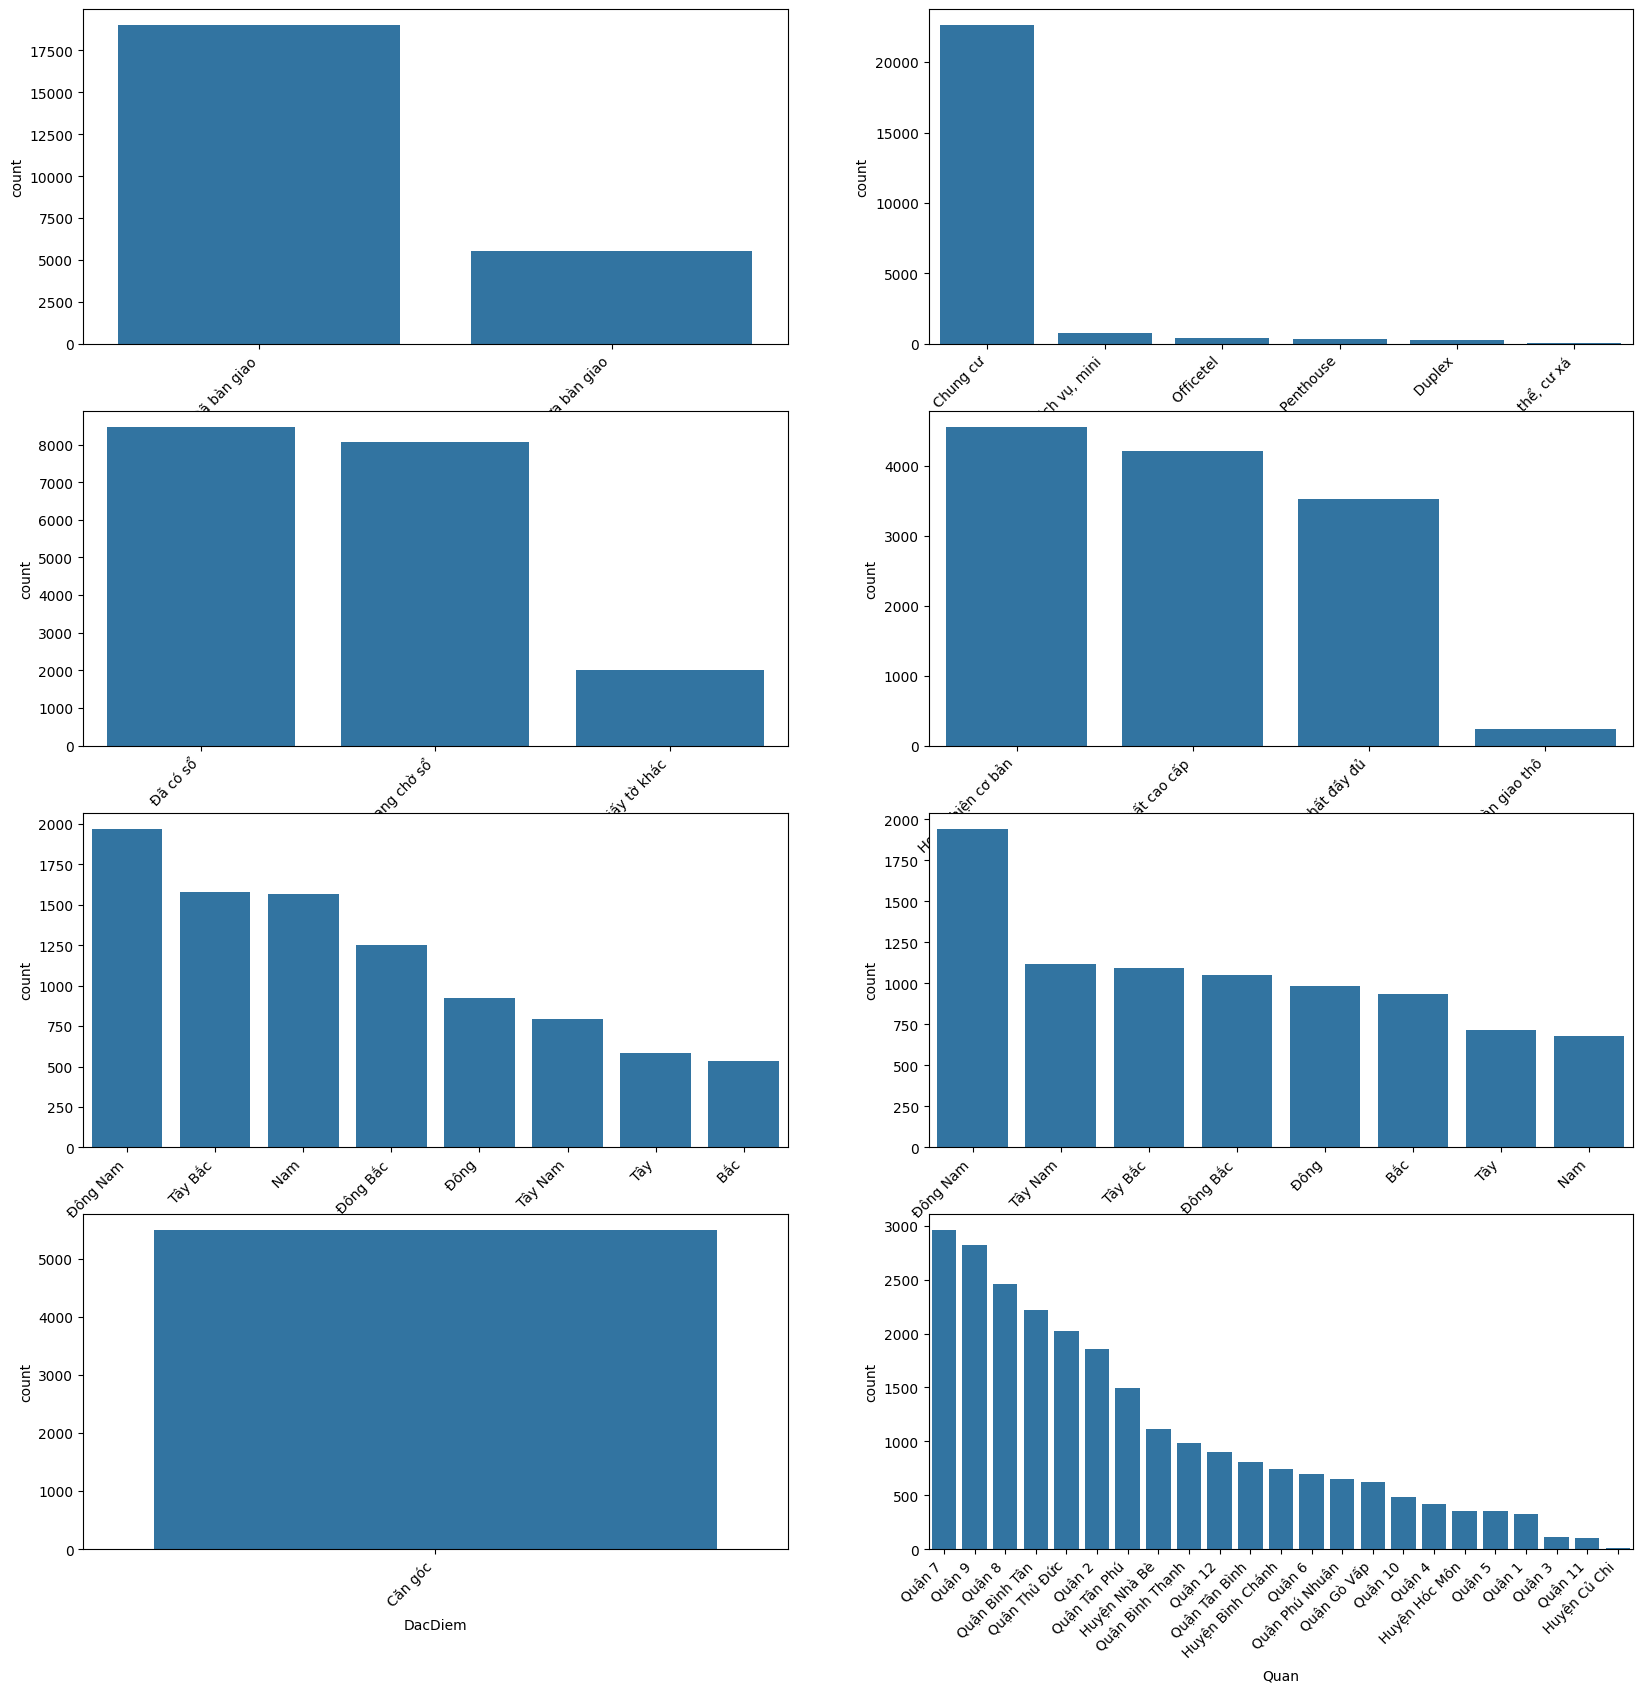

In [30]:
# Trực quan hóa biến số phân loại (categorical variables)
# các biểu đồ liên tiếp nhau, giảm dần theo số lượng
categorical_vars = ['TinhTrangBDS', 'Loai', 'GiayTo', 'TinhTrangNoiThat', 'HuongCuaChinh', 'HuongBanCong', 'DacDiem', 'Quan']

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for ax, catplot in zip(axes, categorical_vars):
    sns.countplot(x=catplot, data=df, ax=ax, order=df[catplot].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


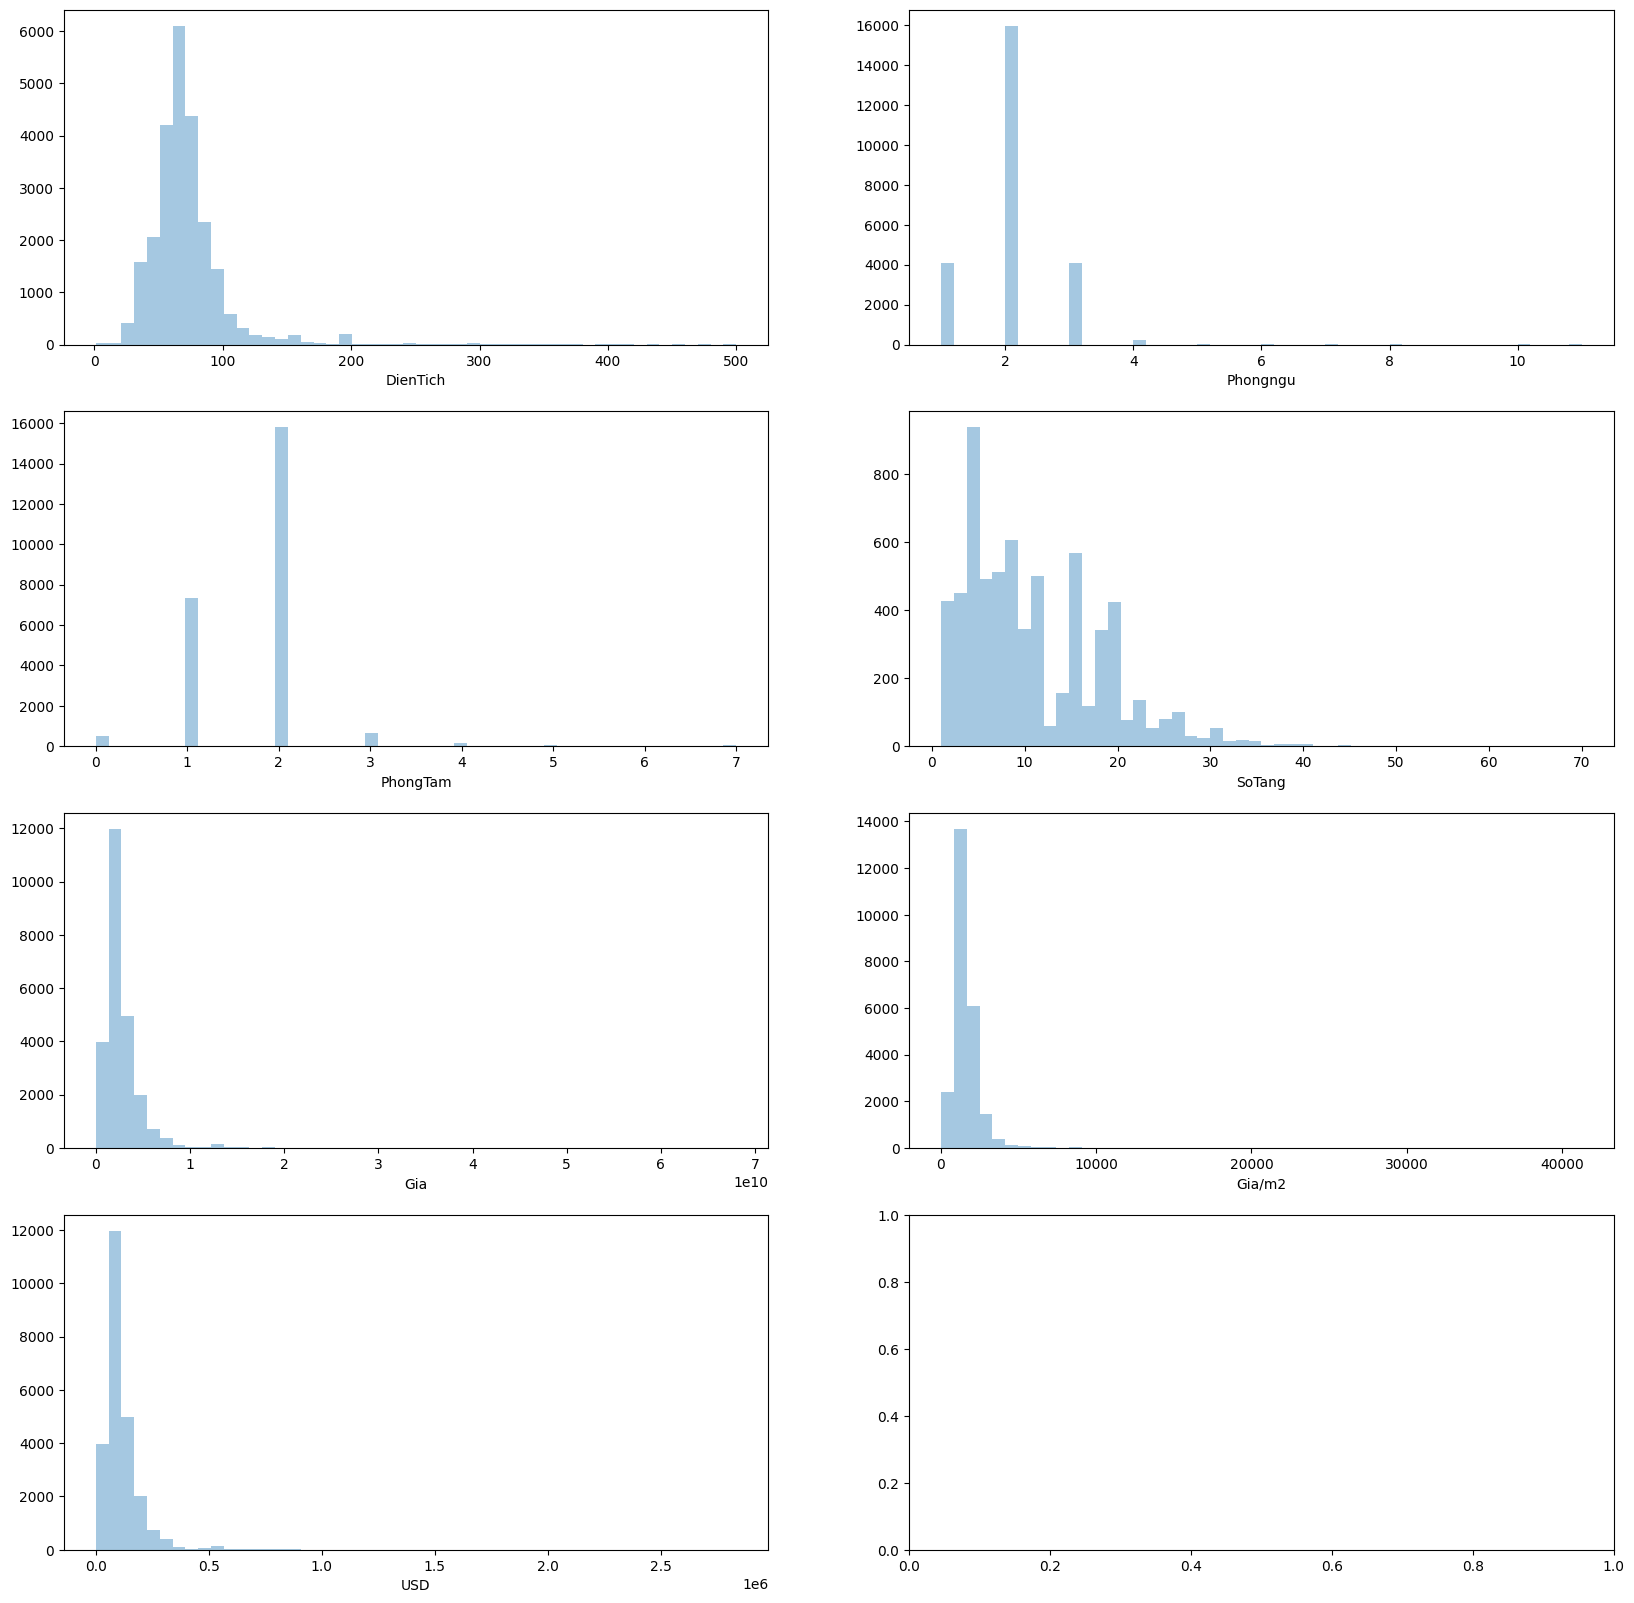

In [32]:

# Trực quan hóa biến số liên tục (continuous variables)
# các biểu đồ liên tiếp nhau, giảm dần theo số lượng
continuous_vars = ['DienTich', 'Phongngu', 'PhongTam', 'SoTang', 'Gia', 'Gia/m2', 'USD']

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for ax, catplot in zip(axes, continuous_vars):
    sns.distplot(df[catplot], ax=ax, kde=False)

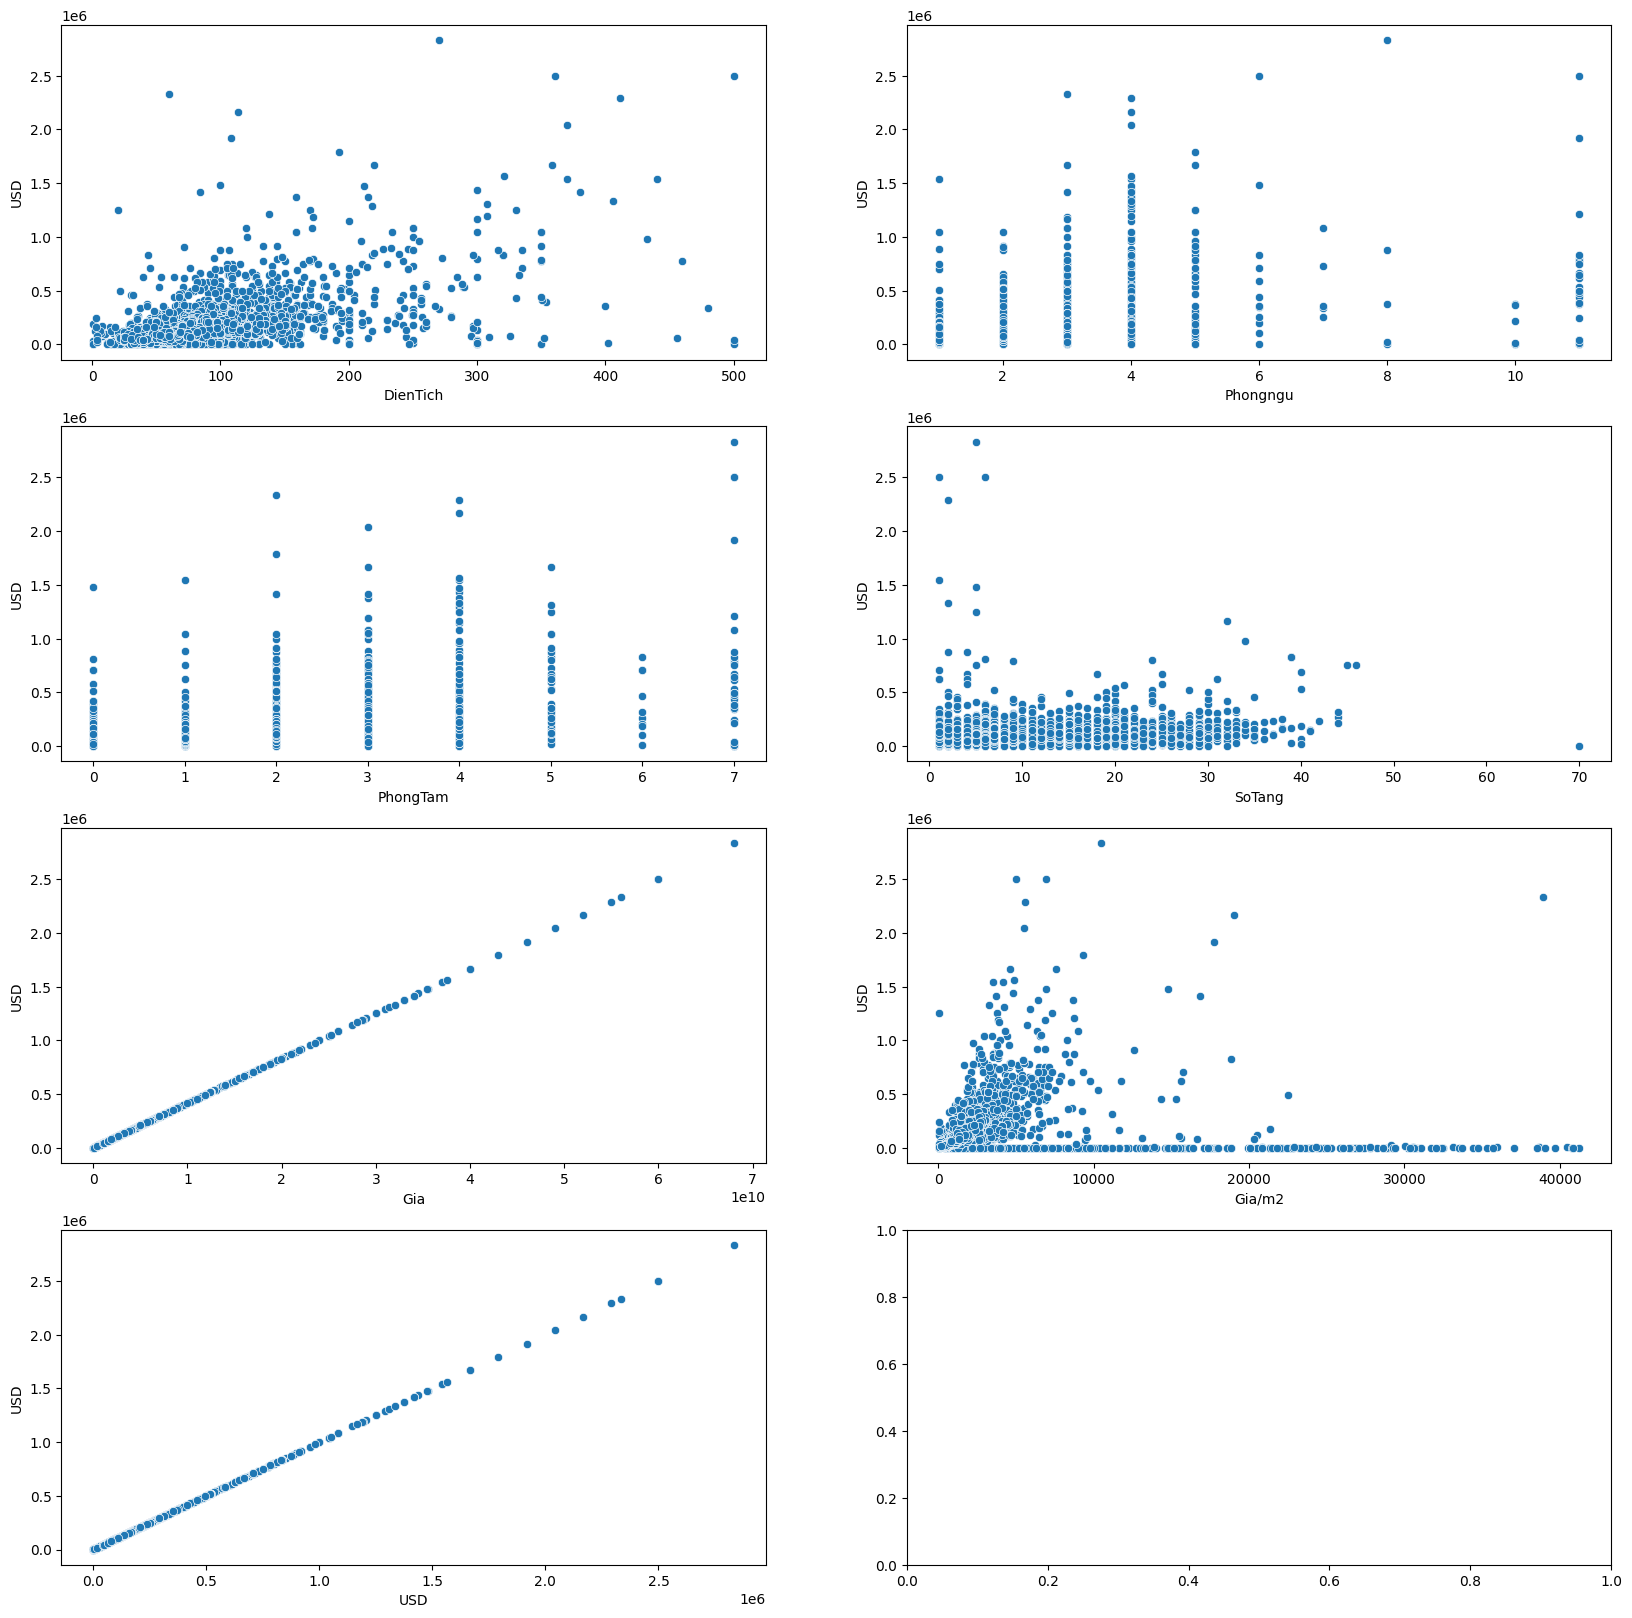

In [33]:
# trực quan hóa các biến với "USD"
# các biểu đồ liên tiếp nhau
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for ax, catplot in zip(axes, continuous_vars):
    sns.scatterplot(x=catplot, y='USD', data=df, ax=ax)

In [ ]:
# nhận xét:
# - "DienTich" và "Gia" có mối tương quan dương
# - "Phongngu" và "PhongTam" có mối tương quan dương
# - "SoTang" và "Gia" có mối tương quan dương